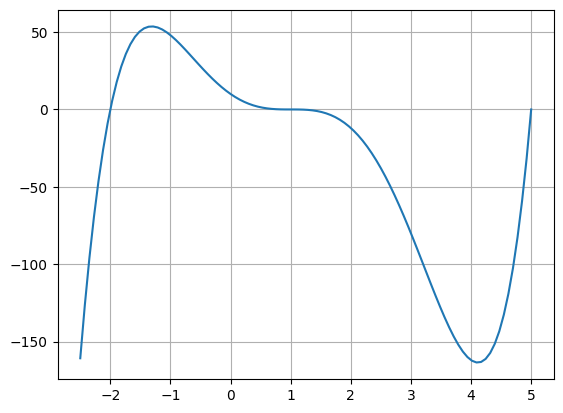

-2.0
1.0
5.000000000000455


In [2]:
#Pregunta 2
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
def f(x): 
    return x**5 - 6*x**4 + 2*x**3 + 20*x**2 - 27*x + 10 



x = np.linspace(-2.5,5,100)
y=f(x)

plt.plot(x,y)
plt.grid()
plt.show()

#Primera raiz 
sol=sp.optimize.bisect(f,-2.5,-1.5)
print(sol)
#Segunda raiz
sol=sp.optimize.bisect(f,0,2)
print(sol)
#Tercera raiz 
sol=sp.optimize.bisect(f,4,5.5)
print(sol)




In [24]:
#Pregunta 2 
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

def gauss_jordan_inversa1(A: np.ndarray) -> np.ndarray:
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = A.astype(float)  # convertir en float, porque si no, convierte en enteros
    
    n = A.shape[0]

    for i in range(0, n):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) <= abs(A[p, i]):
                p = pi
            print("pivote en ejecucion",i,"=",p)

        if p is None:
            # no pivot found.
            logging.info(f"\n{A}")
            raise ValueError("No existe solución única.")

        if p != i:
            logging.info(f"Intercambiando filas {i} y {p}.")
            # swap rows
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux

        A[i]=A[i]/A[i,i]
        # --- Eliminación: loop por fila
        for j in range(n):
            if i == j:
                continue
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]

        logging.info(f"\n{A}")
    print(A)


    return A

def matriz_aumentada(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    """Construye la matriz aumentada de un sistema de ecuaciones lineales.

    ## Parameters

    ``A``: matriz de coeficientes.

    ``b``: vector de términos independientes.

    ## Return

    ``Ab``: matriz aumentada.

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    return np.hstack((A, b))

def separar_m_aumentada(Ab: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Separa la matriz aumentada generada con A=Matriz identtidad b=Matriz inversa.

    ## Parameters
    ``Ab``: matriz aumentada.

    ## Return
    ``b``: Matriz inversa.
    """
    n=Ab.shape[0]
    print(n)
    logging.debug(f"Ab = \n{Ab}")
    logging.debug("Convirtiendo Ab a numpy array")
    Ab = np.array(Ab, dtype=float)
    
    return Ab[:, n:]

A = [[2, -3], [-1, 1]]
A1=[[1,0],[0,1]]
B = [
    [4, 0, 0, 5],
    [1, 0, 4, 0],
    [3, 4, 1, 3],
    [1, 3, 3, 0],
]
B1 = [
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
]


B_B1=matriz_aumentada(B,B1)
A_A1=matriz_aumentada(A,A1)
print(A_A1)

print("Matriz expandidad de A",gauss_jordan_inversa1(A_A1))
print("Matriz expandida de B",gauss_jordan_inversa1(B_B1))
print("Matriz inversa ",separar_m_aumentada(gauss_jordan_inversa1(A_A1)))
print("Matriz inversa ",separar_m_aumentada(gauss_jordan_inversa1(B_B1)))

[02-19 19:23:14][INFO] 2025-02-19 19:23:14.406641
[[ 2. -3.  1.  0.]
 [-1.  1.  0.  1.]]
pivote en ejecucion 0 = 1
[02-19 19:23:14][INFO] Intercambiando filas 0 y 1.
[02-19 19:23:14][INFO] 
[[ 1. -1. -0. -1.]
 [ 0. -1.  1.  2.]]
[02-19 19:23:14][INFO] 
[[ 1.  0. -1. -3.]
 [-0.  1. -1. -2.]]
[[ 1.  0. -1. -3.]
 [-0.  1. -1. -2.]]
Matriz expandidad de A [[ 1.  0. -1. -3.]
 [-0.  1. -1. -2.]]
pivote en ejecucion 0 = 1
pivote en ejecucion 0 = 1
pivote en ejecucion 0 = 3
[02-19 19:23:14][INFO] Intercambiando filas 0 y 3.
[02-19 19:23:14][INFO] 
[[  1.   3.   3.   0.   0.   0.   0.   1.]
 [  0.  -3.   1.   0.   0.   1.   0.  -1.]
 [  0.  -5.  -8.   3.   0.   0.   1.  -3.]
 [  0. -12. -12.   5.   1.   0.   0.  -4.]]
pivote en ejecucion 1 = 1
pivote en ejecucion 1 = 1
[02-19 19:23:14][INFO] 
[[  1.           0.           4.           0.           0.
    1.           0.           0.        ]
 [ -0.           1.          -0.33333333  -0.          -0.
   -0.33333333  -0.           0.33333333]
 [ 

In [ ]:
# Pregunta 2 - Solución Corregida
import logging
from sys import stdout
from datetime import datetime
import numpy as np

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

def gauss_jordan_inversa(A: np.ndarray) -> np.ndarray:
    """Devuelve la matriz inversa mediante el método de Gauss-Jordan.

    ## Parameters

    ``A``: matriz aumentada del sistema de ecuaciones lineales. Debe ser de tamaño n-by-2n.

    ## Return

    ``A_inv``: matriz inversa de la parte izquierda original de A.

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    n = A.shape[0]
    assert A.shape == (n, 2*n), "La matriz A debe ser de tamaño n-by-2n." 

    for i in range(n):  # Iterar por cada columna pivote
        # Encontrar el pivote máximo en la columna i
        p = np.argmax(np.abs(A[i:, i])) + i
        if A[p, i] == 0:
            raise ValueError("La matriz es singular y no tiene inversa.")
        if p != i:
            logging.info(f"Intercambiando filas {i} y {p}.")
            A[[i, p]] = A[[p, i]]  # Intercambiar filas

        # Normalizar la fila pivote
        pivote = A[i, i]
        A[i] = A[i] / pivote  # Hacer el pivote 1

        # Eliminar todos los elementos en la columna i excepto el pivote
        for j in range(n):
            if j == i:
                continue
            factor = A[j, i]
            A[j] -= factor * A[i]  # Restar la fila pivote multiplicada por el factor

        logging.info(f"\n{A}")

    # Extraer la matriz inversa (lado derecho de la matriz aumentada)
    A_inv = A[:, n:]
    return A_inv

def matriz_aumentada(A: np.ndarray, I: np.ndarray) -> np.ndarray:
    """Construye la matriz aumentada [A | I] para encontrar la inversa."""
    return np.hstack((A, I))

# Ejemplo de uso:
A = np.array([[2, -3], [-1, 1]], dtype=float)
I = np.eye(2)
A_aumentada = matriz_aumentada(A, I)
A_inversa = gauss_jordan_inversa(A_aumentada)
print("Inversa de A:\n", A_inversa)

B = np.array([
    [4, 0, 0, 5],
    [1, 0, 4, 0],
    [3, 4, 1, 3],
    [1, 3, 3, 0],
], dtype=float)
I_B = np.eye(4)
B_aumentada = matriz_aumentada(B, I_B)
B_inversa = gauss_jordan_inversa(B_aumentada)
print("Inversa de B:\n", B_inversa)


[02-19 18:23:19][INFO] 2025-02-19 18:23:19.244470
[02-19 18:23:19][INFO] 
[[ 1.  -1.5  0.5  0. ]
 [ 0.  -0.5  0.5  1. ]]
[02-19 18:23:19][INFO] 
[[ 1.  0. -1. -3.]
 [-0.  1. -1. -2.]]
Inversa de A:
 [[-1. -3.]
 [-1. -2.]]
[02-19 18:23:19][INFO] 
[[ 1.    0.    0.    1.25  0.25  0.    0.    0.  ]
 [ 0.    0.    4.   -1.25 -0.25  1.    0.    0.  ]
 [ 0.    4.    1.   -0.75 -0.75  0.    1.    0.  ]
 [ 0.    3.    3.   -1.25 -0.25  0.    0.    1.  ]]
[02-19 18:23:19][INFO] Intercambiando filas 1 y 2.
[02-19 18:23:19][INFO] 
[[ 1.      0.      0.      1.25    0.25    0.      0.      0.    ]
 [ 0.      1.      0.25   -0.1875 -0.1875  0.      0.25    0.    ]
 [ 0.      0.      4.     -1.25   -0.25    1.      0.      0.    ]
 [ 0.      0.      2.25   -0.6875  0.3125  0.     -0.75    1.    ]]
[02-19 18:23:19][INFO] 
[[ 1.        0.        0.        1.25      0.25      0.        0.
   0.      ]
 [ 0.        1.        0.       -0.109375 -0.171875 -0.0625    0.25
   0.      ]
 [ 0.        0.      

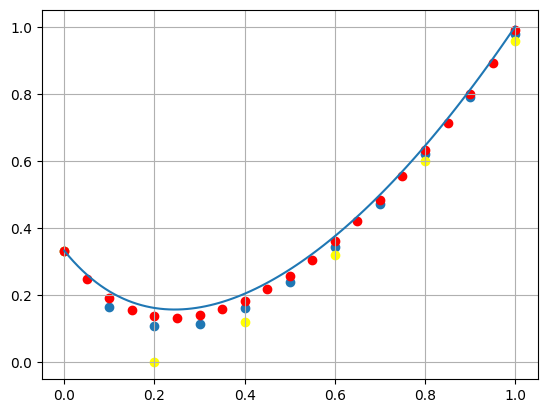

0.1
f 0.1
Error relativo N=10 0.12909541068138491
Error relativo N=5 0.2797909081673575
Error relativo N=20 0.0631456968405627


In [ ]:
#Pregunta 3 
from src import ODE_euler
def dy(t,y): 
    return -5*y+5*t**2+2*t

def y(t): 
    return t**2+(1/3*np.exp(-5*t))
a=0
b=1
y_0=1/3
n=10

ys,ts,hs= ODE_euler(a=a,b=b,f=dy,y_t0=y_0,N=n)
ys1,ts1,hs1= ODE_euler(a=a,b=b,f=dy,y_t0=y_0,N=5)
ys2,ts2,hs2= ODE_euler(a=a,b=b,f=dy,y_t0=y_0,N=20)
x=np.linspace(0,1,100)
y_Exact=y(x)
plt.plot(x,y_Exact)
plt.scatter(ts,ys)
plt.scatter(ts1,ys1,color="yellow",label="N=5")
plt.scatter(ts2,ys2,color="red",label="N=20")
plt.grid()
plt.show()
e_relativo=0
e_relativo1=0
e_relativo2=0
print(ts[1])
for i in range(len(ys)):
    y_real=y(ts[i])
    y_aprox=ys[i]
    e_relativo+=abs((y_real-y_aprox)/y_real) 

for j in range(len(ys1)):
    y_real1=y(ts1[j])
    y_aprox1=ys1[j]
    e_relativo1+=abs((y_real1-y_aprox1)/y_real1)

for k in range(len(ys2)):
    y_real2=y(ts2[k])
    y_aprox2=ys2[k]
    e_relativo2+=abs((y_real2-y_aprox2)/y_real2)



print("f",hs)
print("Error relativo N=10",e_relativo/len(ys))
print("Error relativo N=5",e_relativo1/len(ys1))
print("Error relativo N=20",e_relativo2/len(ys2))

